# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [67]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import TimeFrame
from MCForecastTools import MCSimulation

%matplotlib inline

In [68]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [69]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [70]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [71]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [72]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, sort_keys = True, indent=3))


{
   "data": {
      "1": {
         "circulating_supply": 19046537,
         "id": 1,
         "last_updated": 1653232465,
         "max_supply": 21000000,
         "name": "Bitcoin",
         "quotes": {
            "USD": {
               "market_cap": 571581991344,
               "percent_change_1h": -0.200886020790795,
               "percent_change_24h": 1.99571510791293,
               "percent_change_7d": -0.765763686191655,
               "percentage_change_1h": -0.200886020790795,
               "percentage_change_24h": 1.99571510791293,
               "percentage_change_7d": -0.765763686191655,
               "price": 29958.0,
               "volume_24h": 15532874770
            }
         },
         "rank": 1,
         "symbol": "BTC",
         "total_supply": 19046537,
         "website_slug": "bitcoin"
      }
   },
   "metadata": {
      "error": null,
      "num_cryptocurrencies": 3106,
      "timestamp": 1653232465
   }
}


In [73]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, sort_keys = True, indent=3))


{
   "data": {
      "1027": {
         "circulating_supply": 120880197,
         "id": 1027,
         "last_updated": 1653232456,
         "max_supply": 0,
         "name": "Ethereum",
         "quotes": {
            "USD": {
               "market_cap": 244269456801,
               "percent_change_1h": -0.167960187961188,
               "percent_change_24h": 2.26821207465549,
               "percent_change_7d": -2.32827621538873,
               "percentage_change_1h": -0.167960187961188,
               "percentage_change_24h": 2.26821207465549,
               "percentage_change_7d": -2.32827621538873,
               "price": 2016.17,
               "volume_24h": 8216181924
            }
         },
         "rank": 2,
         "symbol": "ETH",
         "total_supply": 120880197,
         "website_slug": "ethereum"
      }
   },
   "metadata": {
      "error": null,
      "num_cryptocurrencies": 3106,
      "timestamp": 1653232456
   }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [74]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
print(f"${round(btc_price,2)} USD.")


$29958.0 USD.


In [75]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
print(f"${round(eth_price,2)} USD.")


$2016.17 USD.


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [76]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(f"${round(btc_value,2)} USD.")

$35949.6 USD.


In [77]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(f"${round(eth_value,2)} USD.")

$10685.7 USD.


In [78]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"${round(total_crypto_wallet,2)} USD.")


$46635.3 USD.


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [79]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [80]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key =os.getenv("ALPACA_API_KEY")
alpaca_secret_key =os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")


Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [81]:
# Create the Alpaca tradeapi.REST object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [82]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
TimeFrame.Day = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp('2022-05-18',tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-05-18',tz='America/New_York').isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [83]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
close_price_df = api.get_bars(
    tickers,
    TimeFrame.Day,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
agg = close_price_df[close_price_df['symbol']=='AGG'].drop('symbol',axis=1)
spy = close_price_df[close_price_df['symbol']=='SPY'].drop('symbol',axis=1)


# Concatenate the ticker DataFrames
close_price_df = pd.concat([agg,spy], axis=1, keys=['AGG','SPY'])

# Review the first 5 rows of the Alpaca DataFrame
close_price_df.head(5)


AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2022-05-18 04:00:00+00:00  102.11  102.639  102.075  102.59  6091812   

                                                     SPY                 \
                          trade_count       vwap    open   high     low   
timestamp                                                                 
2022-05-18 04:00:00+00:00       20134  102.49456  403.52  403.8  390.55   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-05-18 04:00:00+00:00  391.86  117208507      962719  396.040647

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [84]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = close_price_df['AGG']['close']

# Print the AGG closing price
print(agg_close_price)


timestamp
2022-05-18 04:00:00+00:00    102.59
Name: close, dtype: float64


In [85]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = close_price_df['SPY']['close']

# Print the SPY closing price
print(spy_close_price)


timestamp
2022-05-18 04:00:00+00:00    391.86
Name: close, dtype: float64


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [86]:
# Calculate the current value of the bond portion of the portfolio
agg_value = float(agg_shares * agg_close_price)

# Print the current value of the bond portfolio
print(f"Value of Bond Portfolio is ${agg_value:.2f}.")


Value of Bond Portfolio is $20518.00.


In [87]:
# Calculate the current value of the stock portion of the portfolio
spy_value = float(spy_shares * spy_close_price)

# Print the current value of the stock portfolio
print(f"Value of Stock Portfolio is ${spy_value:.2f}.")

Value of Stock Portfolio is $43104.60.


In [88]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"Value of both portfolios is ${total_stocks_bonds:.2f}.")

Value of both portfolios is $63622.60.


In [89]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f"Both wallets combined balances equal ${total_portfolio:.2f}.")


Both wallets combined balances equal $110257.90.


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [90]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet,total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[46635.301, 63622.6]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [91]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data,columns=['amount'], index=['crypto','stock/bond'])

# Display the savings_df DataFrame
savings_df


,amount
crypto,46635.301
stock/bond,63622.600


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Total balance of Portfolio'}, ylabel='amount'>

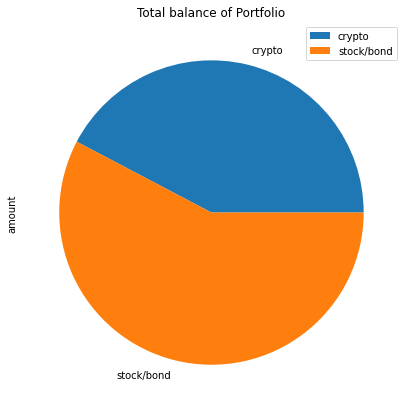

In [92]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot(kind="pie",y='amount', figsize=(7,7), title= "Total balance of Portfolio")


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [93]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income *3
emergency_fund_value

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [94]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print('Congrats, you have enough money in this fund!')
elif total_portfolio == emergency_fund_value:
    print('Congrats, you reached an important financial goal.')
else:
    print(f'You are ${emergency_fund_value - total_portfolio:.2f} from reaching the goal. Keep Saving!')

Congrats, you have enough money in this fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [100]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp('2019-05-18',tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-05-18',tz='America/New_York').isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [101]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
three_year_pricing_df = api.get_bars(
    tickers,
    TimeFrame.Day,
    start = start_date,
    end = end_date,
).df

# Reorganize the DataFrame
# Separate ticker data
agg_three_year = three_year_pricing_df[three_year_pricing_df['symbol']=='AGG'].drop('symbol',axis=1)
spy_three_year = three_year_pricing_df[three_year_pricing_df['symbol']=='SPY'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
three_year_pricing_df = pd.concat([agg_three_year,spy_three_year], axis=1, keys=["AGG","SPY"])

# Display both the first and last five rows of the DataFrame
display(three_year_pricing_df.head())
display(three_year_pricing_df.tail())

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2019-05-20 04:00:00+00:00  108.98  109.0568  108.86  108.88  2035081   
2019-05-21 04:00:00+00:00  108.86  108.9100  108.81  108.87  2029825   
2019-05-22 04:00:00+00:00  108.92  109.0900  108.92  109.05  3509876   
2019-05-23 04:00:00+00:00  109.18  109.5000  109.14  109.37  4922489   
2019-05-24 04:00:00+00:00  109.37  109.4499  109.33  109.41  2010339   

                                                      SPY                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2019-05-20 04:00:00+00:00        9880  108.929741  284.06  285.962  283.12   
2019-05-21 04:00:00+00:00       10303  108.866734  285.83  286.930  285.55   
2019-05-22 04:00:00+00:00       16272  109.052999  285.43  286.690  285.10   
2019-05-23 04:00:00+00:00       21453  109.375381  283.16  283.210  280.57   
2019-05-24 04:00:00+00:00        9636  109.398082  283.75  284.200  282.09   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2019-05-20 04:00:00+00:00  283.95  63153446      344197  284.223615  
2019-05-21 04:00:00+00:00  286.51  47390688      256169  286.268748  
2019-05-22 04:00:00+00:00  285.63  49717083      260143  285.783071  
2019-05-23 04:00:00+00:00  282.14  99142377      466151  281.947377  
2019-05-24 04:00:00+00:00  282.78  57468147      267403  283.004360

AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2022-05-12 04:00:00+00:00  102.94  103.140  102.865  102.95  9011922   
2022-05-13 04:00:00+00:00  102.75  102.780  102.480  102.51  6701432   
2022-05-16 04:00:00+00:00  102.71  102.970  102.690  102.74  7238402   
2022-05-17 04:00:00+00:00  102.27  102.430  102.140  102.18  6604743   
2022-05-18 04:00:00+00:00  102.11  102.639  102.075  102.59  6091812   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2022-05-12 04:00:00+00:00       29535  103.014617  389.58  395.80  385.1500   
2022-05-13 04:00:00+00:00       26730  102.590449  396.73  403.18  395.6100   
2022-05-16 04:00:00+00:00       23197  102.788078  400.04  403.97  397.6000   
2022-05-17 04:00:00+00:00       28112  102.269471  406.51  408.55  402.5824   
2022-05-18 04:00:00+00:00       20134  102.494560  403.52  403.80  390.5500   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-05-12 04:00:00+00:00  392.34  125230250     1476378  389.974924  
2022-05-13 04:00:00+00:00  401.72  103901082      855050  399.875308  
2022-05-16 04:00:00+00:00  400.09   78874575      731213  400.635833  
2022-05-17 04:00:00+00:00  408.26   80507900      737208  405.686032  
2022-05-18 04:00:00+00:00  391.86  117208507      962719  396.040647

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [105]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_30 = MCSimulation(
    portfolio_data= three_year_pricing_df,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252 * 30
)

# Review the simulation input data
MC_30.portfolio_data.head()


AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2019-05-20 04:00:00+00:00  108.98  109.0568  108.86  108.88  2035081   
2019-05-21 04:00:00+00:00  108.86  108.9100  108.81  108.87  2029825   
2019-05-22 04:00:00+00:00  108.92  109.0900  108.92  109.05  3509876   
2019-05-23 04:00:00+00:00  109.18  109.5000  109.14  109.37  4922489   
2019-05-24 04:00:00+00:00  109.37  109.4499  109.33  109.41  2010339   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-05-20 04:00:00+00:00        9880  108.929741          NaN  284.06   
2019-05-21 04:00:00+00:00       10303  108.866734    -0.000092  285.83   
2019-05-22 04:00:00+00:00       16272  109.052999     0.001653  285.43   
2019-05-23 04:00:00+00:00       21453  109.375381     0.002934  283.16   
2019-05-24 04:00:00+00:00        9636  109.398082     0.000366  283.75   

                                                                          \
                              high     low   close    volume trade_count   
timestamp                                                                  
2019-05-20 04:00:00+00:00  285.962  283.12  283.95  63153446      344197   
2019-05-21 04:00:00+00:00  286.930  285.55  286.51  47390688      256169   
2019-05-22 04:00:00+00:00  286.690  285.10  285.63  49717083      260143   
2019-05-23 04:00:00+00:00  283.210  280.57  282.14  99142377      466151   
2019-05-24 04:00:00+00:00  284.200  282.09  282.78  57468147      267403   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-05-20 04:00:00+00:00  284.223615          NaN  
2019-05-21 04:00:00+00:00  286.268748     0.009016  
2019-05-22 04:00:00+00:00  285.783071    -0.003071  
2019-05-23 04:00:00+00:00  281.947377    -0.012219  
2019-05-24 04:00:00+00:00  283.004360     0.002268

In [106]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_30.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 110.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 120.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 130.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 140.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 150.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 160.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 170.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 180.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 190.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 200.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 210.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 220.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 230.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 240.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 250.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 260.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 270.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 280.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 290.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 300.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 310.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 320.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 330.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 340.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 350.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 360.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 370.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 380.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 390.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 400.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 410.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 420.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 430.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 440.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 450.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 460.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 470.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 480.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 490.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012302,1.017937,0.994119,1.003498,0.989802,0.998737,1.004826,0.994409,1.003529,1.001085,...,1.009562,1.008010,0.985775,0.992371,1.010404,0.980102,0.999951,0.995448,1.006783,0.991689
2,1.004006,1.017375,0.993403,1.006814,1.001431,1.003140,0.997225,1.011384,0.992658,0.979476,...,1.022225,0.994946,0.956626,0.987739,0.998869,0.985627,0.986068,0.998290,1.013273,1.001780
3,0.996991,1.023361,0.993846,1.015794,1.007672,1.020714,1.012736,1.025967,0.996181,0.981848,...,1.020677,1.008971,0.958275,0.996347,1.013520,0.980781,0.997805,0.993682,0.988363,0.997368
4,1.009175,1.018590,0.994009,1.014411,1.012764,1.034165,1.026597,1.015943,1.001119,0.993644,...,1.022725,0.993134,0.969693,0.990774,1.019271,0.997217,1.012803,1.005723,0.982568,0.995938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.301019,4.393565,6.825210,10.102246,6.635539,13.014301,1.735774,6.231854,16.109837,5.541050,...,13.182579,9.396789,17.522916,51.111235,9.961921,15.640580,12.643367,9.872302,3.798639,6.370423
7557,5.251047,4.383942,6.794318,10.109214,6.678740,12.846399,1.751158,6.254956,16.201303,5.603085,...,13.034530,9.459788,17.446096,50.852000,10.003009,15.598742,12.777145,10.001257,3.812789,6.321879
7558,5.314308,4.389581,6.730086,9.991801,6.783201,12.854754,1.728314,6.311172,16.082841,5.673833,...,13.104504,9.501295,17.496864,51.157329,9.884190,15.710909,12.853213,10.047591,3.831653,6.333475
7559,5.239726,4.415250,6.732613,9.944743,6.801553,12.868230,1.724560,6.343355,16.259409,5.698616,...,13.146680,9.483835,17.456229,51.306817,9.891146,15.637046,12.621259,10.095480,3.835827,6.309669


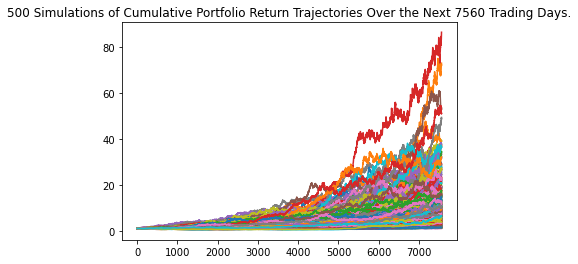

In [107]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_30_line_plot = MC_30.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

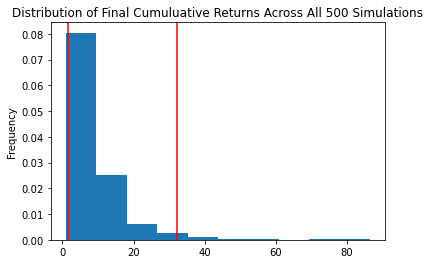

In [108]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_30_dist_plot = MC_30.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [111]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_stats = MC_30.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
MC_summary_stats

/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              9.046469
std               8.795433
min               0.964142
25%               3.824707
50%               6.703070
75%              10.598706
max              86.503794
95% CI Lower      1.578011
95% CI Upper     32.104899
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [119]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"${total_stocks_bonds:.2f}")


$63622.60


In [120]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = (MC_summary_stats[8]* total_stocks_bonds)
ci_upper_thirty_cumulative_return = (MC_summary_stats[9]* total_stocks_bonds)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds:.2f} in the portfolio"
      f" over the next year will end within the range of"
      f" ${ci_lower_thirty_cumulative_return:.2f} and ${ci_upper_thirty_cumulative_return:.2f}.")

There is a 95% chance that an initial investment of $63622.60 in the portfolio over the next year will end within the range of $100397.18 and $2042597.12.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [121]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_10 = MCSimulation(
    portfolio_data= three_year_pricing_df,
    weights=[.20,.80],
    num_simulation=500,
    num_trading_days=252 * 10
)
# Review the simulation input data
MC_10.portfolio_data.head()


AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2019-05-20 04:00:00+00:00  108.98  109.0568  108.86  108.88  2035081   
2019-05-21 04:00:00+00:00  108.86  108.9100  108.81  108.87  2029825   
2019-05-22 04:00:00+00:00  108.92  109.0900  108.92  109.05  3509876   
2019-05-23 04:00:00+00:00  109.18  109.5000  109.14  109.37  4922489   
2019-05-24 04:00:00+00:00  109.37  109.4499  109.33  109.41  2010339   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-05-20 04:00:00+00:00        9880  108.929741          NaN  284.06   
2019-05-21 04:00:00+00:00       10303  108.866734    -0.000092  285.83   
2019-05-22 04:00:00+00:00       16272  109.052999     0.001653  285.43   
2019-05-23 04:00:00+00:00       21453  109.375381     0.002934  283.16   
2019-05-24 04:00:00+00:00        9636  109.398082     0.000366  283.75   

                                                                          \
                              high     low   close    volume trade_count   
timestamp                                                                  
2019-05-20 04:00:00+00:00  285.962  283.12  283.95  63153446      344197   
2019-05-21 04:00:00+00:00  286.930  285.55  286.51  47390688      256169   
2019-05-22 04:00:00+00:00  286.690  285.10  285.63  49717083      260143   
2019-05-23 04:00:00+00:00  283.210  280.57  282.14  99142377      466151   
2019-05-24 04:00:00+00:00  284.200  282.09  282.78  57468147      267403   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-05-20 04:00:00+00:00  284.223615          NaN  
2019-05-21 04:00:00+00:00  286.268748     0.009016  
2019-05-22 04:00:00+00:00  285.783071    -0.003071  
2019-05-23 04:00:00+00:00  281.947377    -0.012219  
2019-05-24 04:00:00+00:00  283.004360     0.002268

In [122]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 110.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 120.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 130.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 140.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 150.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 160.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 170.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 180.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 190.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 200.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 210.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 220.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 230.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 240.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 250.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 260.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 270.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 280.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 290.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 300.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 310.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 320.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 330.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 340.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 350.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 360.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 370.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 380.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 390.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 400.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 410.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 420.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 430.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 440.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 450.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 460.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 470.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 480.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

Running Monte Carlo simulation number 490.


/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usua

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007278,0.990876,1.011402,0.999968,1.006217,0.992732,1.018131,1.005343,0.999098,1.015842,...,0.994765,1.005308,0.992254,1.008150,0.993921,0.997605,1.006903,1.001243,1.018429,0.997137
2,1.008221,0.986387,1.019200,1.017800,1.009938,1.002187,1.002646,0.996401,0.988156,1.025910,...,0.996597,0.982911,0.988992,1.001485,1.007554,0.997161,1.021331,1.004668,1.006108,1.006361
3,1.002560,0.985065,1.031444,0.999245,1.019376,0.998574,1.012287,0.996501,0.964899,1.024545,...,1.016392,0.987637,1.004119,1.002079,1.014322,0.982072,1.043401,0.977039,1.015128,0.975294
4,0.991941,0.966528,1.035104,0.998603,1.025368,1.018005,1.028414,0.999802,0.977367,1.028529,...,1.025517,0.994916,1.016456,1.009600,1.013207,0.986902,1.030707,0.972472,1.017821,0.983550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.950299,3.078692,1.384257,0.641690,3.509536,2.386559,2.275932,1.972114,0.499047,2.047984,...,1.937181,1.760272,1.521024,2.211518,1.214339,4.684607,4.049600,1.295358,2.697665,5.384627
2517,1.930720,3.058520,1.371433,0.652363,3.554849,2.351885,2.256020,1.944895,0.498946,2.055586,...,1.957609,1.783656,1.534577,2.224355,1.212326,4.702663,4.115076,1.319541,2.692938,5.298099
2518,1.930701,3.150418,1.388997,0.638533,3.515893,2.345211,2.281084,1.930089,0.496686,2.055810,...,1.963032,1.818127,1.535232,2.195990,1.232294,4.744887,4.002624,1.304704,2.676805,5.323834
2519,1.897104,3.105884,1.400763,0.632714,3.505845,2.341495,2.281631,1.960404,0.500224,2.021002,...,1.961183,1.845261,1.526219,2.195054,1.244495,4.834855,3.939232,1.302311,2.652537,5.141669


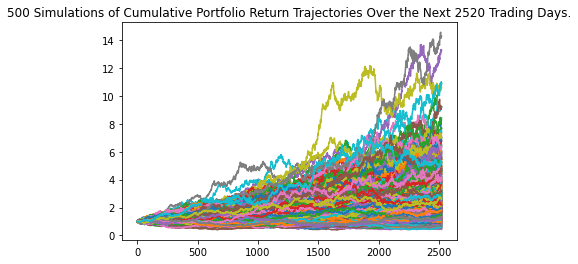

In [123]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_10_line_plot = MC_10.plot_simulation()

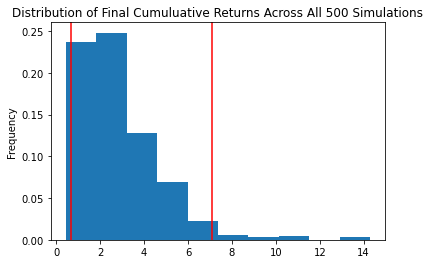

In [124]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_10_dist_plot = MC_10.plot_distribution()


In [126]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_10_summary_stats = MC_10.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
MC_10_summary_stats

/Users/danielboyne/Desktop/SMU_Fintech/ModuleChallenge_5/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              2.863599
std               1.825549
min               0.432478
25%               1.616450
50%               2.426917
75%               3.655497
max              14.293646
95% CI Lower      0.671394
95% CI Upper      7.076433
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [127]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"${total_stocks_bonds:.2f}")


$63622.60


In [128]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = (MC_10_summary_stats[8]* total_stocks_bonds)
ci_upper_ten_cumulative_return = (MC_10_summary_stats[9]* total_stocks_bonds)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds:.2f} in the portfolio"
      f" over the next year will end within the range of"
      f" ${ci_lower_ten_cumulative_return:.2f} and ${ci_upper_ten_cumulative_return:.2f}.")

There is a 95% chance that an initial investment of $63622.60 in the portfolio over the next year will end within the range of $42715.84 and $450221.06.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

***Anwser*** Potentially depending on factors to the client and how the market performed but not probable. I would advise the 30 year plan because the 10 year plan has more risk to the downside which if happend wouldn't let them retire early as they potentialy could lose money. 